In [ ]:
!unzip /content/drive/MyDrive/seg_train.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/mountain/7539.jpg  
  inflating: seg_train/mountain/7551.jpg  
  inflating: seg_train/mountain/7560.jpg  
  inflating: seg_train/mountain/7565.jpg  
  inflating: seg_train/mountain/7578.jpg  
  inflating: seg_train/mountain/7581.jpg  
  inflating: seg_train/mountain/7586.jpg  
  inflating: seg_train/mountain/7647.jpg  
  inflating: seg_train/mountain/7652.jpg  
  inflating: seg_train/mountain/7654.jpg  
  inflating: seg_train/mountain/7662.jpg  
  inflating: seg_train/mountain/767.jpg  
  inflating: seg_train/mountain/7672.jpg  
  inflating: seg_train/mountain/7679.jpg  
  inflating: seg_train/mountain/7681.jpg  
  inflating: seg_train/mountain/7693.jpg  
  inflating: seg_train/mountain/7695.jpg  
  inflating: seg_train/mountain/7698.jpg  
  inflating: seg_train/mountain/7700.jpg  
  inflating: seg_train/mountain/771.jpg  
  inflating: seg_train/mountain/7715.jpg  
  inflating: seg_train/mountain/7744.jpg  
  inf

In [ ]:
!rm -rf sample_data

In [ ]:
import keras
import numpy as np
import tensorflow as tf
from keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
train_ds, val_ds = keras.utils.image_dataset_from_directory(
    "seg_train",
    validation_split=0.3,
    subset="both",
    seed=100,
    image_size=(150, 150),
    batch_size=64
)

Found 14034 files belonging to 6 classes.
Using 9824 files for training.
Using 4210 files for validation.


In [ ]:
data_category = train_ds.class_names
print(data_category)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


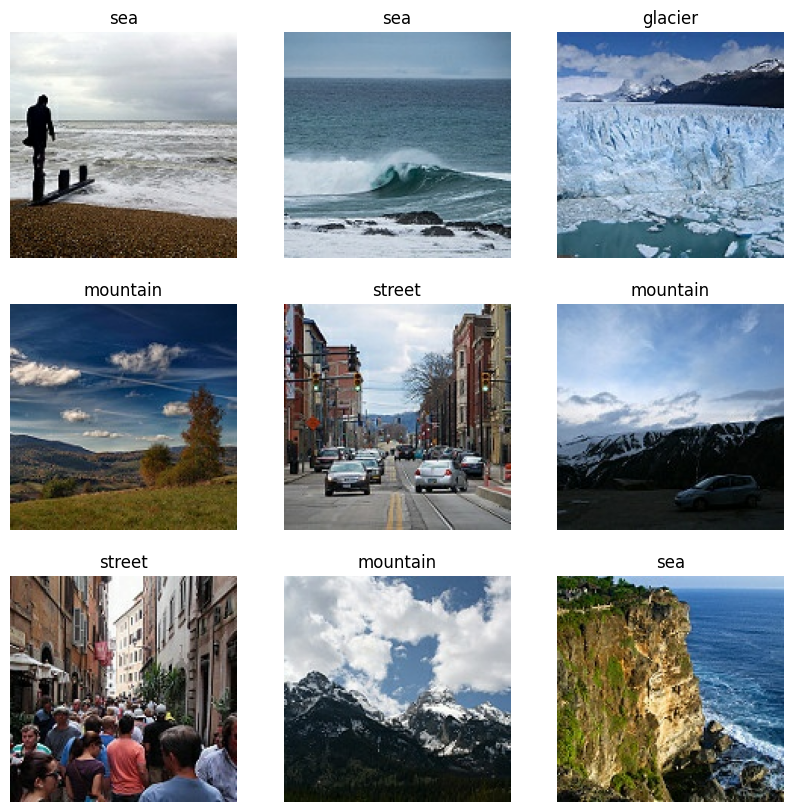

In [ ]:
plt.figure(figsize=(10,10))
for image, labels in train_ds.take(1):
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(data_category[labels[i]])
    plt.axis("off")

In [ ]:
model = tf.keras.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(150, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(75, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(16, activation='relu'),
    layers.Dense(6, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 148, 148, 150)     4200      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 74, 74, 150)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 72, 72, 75)        101325    
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 36, 36, 75)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 34, 34, 32)       

In [ ]:
checkpoint = ModelCheckpoint("best_model.keras", monitor="val_loss", save_best_only=True)

In [ ]:
history = model.fit(train_ds, epochs=50, validation_data=val_ds, callbacks=[checkpoint])

Epoch 1/50
154/154 [==============================] - 20s 131ms/step - loss: 0.2929 - accuracy: 0.8950 - val_loss: 0.4678 - val_accuracy: 0.8513
Epoch 2/50
154/154 [==============================] - 21s 133ms/step - loss: 0.2731 - accuracy: 0.9023 - val_loss: 0.4368 - val_accuracy: 0.8515
Epoch 3/50
154/154 [==============================] - 20s 129ms/step - loss: 0.2789 - accuracy: 0.8996 - val_loss: 0.4579 - val_accuracy: 0.8501
Epoch 4/50
154/154 [==============================] - 20s 130ms/step - loss: 0.2627 - accuracy: 0.9046 - val_loss: 0.4582 - val_accuracy: 0.8629
Epoch 5/50
154/154 [==============================] - 24s 153ms/step - loss: 0.2647 - accuracy: 0.9071 - val_loss: 0.4483 - val_accuracy: 0.8527
Epoch 6/50
154/154 [==============================] - 23s 149ms/step - loss: 0.2462 - accuracy: 0.9098 - val_loss: 0.4803 - val_accuracy: 0.8572
Epoch 7/50
154/154 [==============================] - 22s 139ms/step - loss: 0.2231 - accuracy: 0.9205 - val_loss: 0.5088 - val_ac

KeyboardInterrupt: 

In [ ]:
#since validation loss is increasing, I trained model only for 21 epochs

In [ ]:
!cp /content/drive/MyDrive/best_model.keras best_model.keras

In [ ]:
best_model = tf.keras.models.load_model("best_model.keras")

In [ ]:
!unzip /content/drive/MyDrive/seg_test.zip

Archive:  /content/drive/MyDrive/seg_test.zip
   creating: seg_test/buildings/
  inflating: seg_test/buildings/20057.jpg  
  inflating: seg_test/buildings/20060.jpg  
  inflating: seg_test/buildings/20061.jpg  
  inflating: seg_test/buildings/20064.jpg  
  inflating: seg_test/buildings/20073.jpg  
  inflating: seg_test/buildings/20074.jpg  
  inflating: seg_test/buildings/20078.jpg  
  inflating: seg_test/buildings/20083.jpg  
  inflating: seg_test/buildings/20094.jpg  
  inflating: seg_test/buildings/20096.jpg  
  inflating: seg_test/buildings/20113.jpg  
  inflating: seg_test/buildings/20131.jpg  
  inflating: seg_test/buildings/20140.jpg  
  inflating: seg_test/buildings/20177.jpg  
  inflating: seg_test/buildings/20186.jpg  
  inflating: seg_test/buildings/20206.jpg  
  inflating: seg_test/buildings/20207.jpg  
  inflating: seg_test/buildings/20218.jpg  
  inflating: seg_test/buildings/20228.jpg  
  inflating: seg_test/buildings/20231.jpg  
  inflating: seg_test/buildings/20241.jpg

In [ ]:
test_ds = keras.utils.image_dataset_from_directory(
    "seg_test",
    image_size=(150, 150),
    batch_size=64
)

Found 3000 files belonging to 6 classes.


In [ ]:
#test accuracy
test_results = best_model.evaluate(test_ds)

47/47 [==============================] - 6s 82ms/step - loss: 0.4490 - accuracy: 0.8493


2/2 [==============================] - 0s 23ms/step


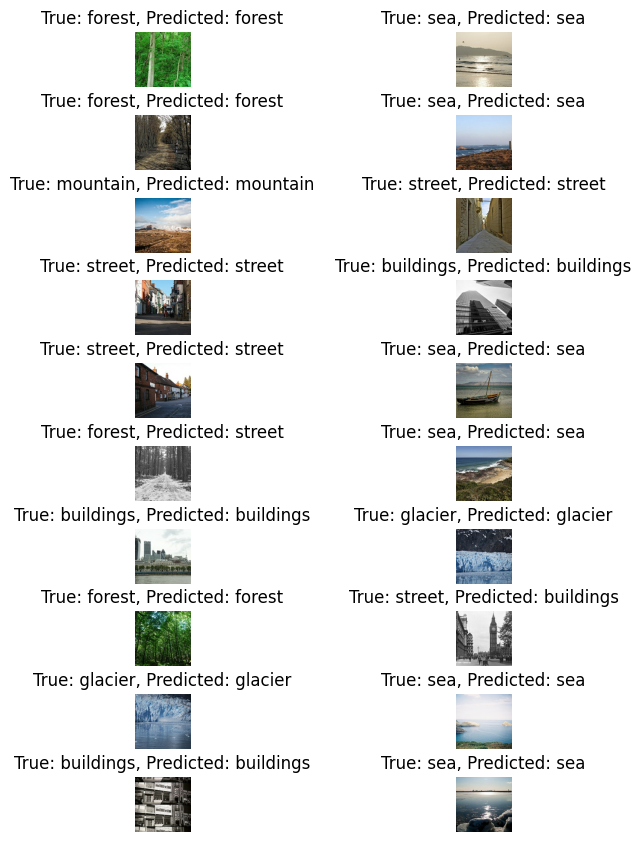

In [ ]:
#test results visualisation
import matplotlib.pyplot as plt
import numpy as np

images, labels = [(images, labels) for images, labels in test_ds.take(1)][0] # Taking just one batch for visualization

predictions = best_model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)

# Plot the images with their predicted labels
plt.figure(figsize=(10, 10))
for i, _ in enumerate(labels[0:20]):
    plt.subplot(10, 2, i + 1)  # Adjust the subplot layout here
    plt.imshow(images[i].numpy().astype("uint8"))

    true_label = data_category[labels[i]] if data_category else labels[i]
    predicted_label = data_category[predicted_labels[i]] if data_category else predicted_labels[i]

    plt.title(f'True: {true_label}, Predicted: {predicted_label}')
    plt.axis("off")

# Adjust spacing between subplots
plt.subplots_adjust(left=0.1, right=0.6, top=0.9, bottom=0.1, wspace=0.8, hspace=0.5)
plt.show()